# Iris Dataset EDA

The Iris Dataset is a classic resource in Machine Learning, featuring information about various plants. It includes key measurements such as Sepal length, Sepal width, Petal length, and Petal width in centimeters as our features. The objective here is to to build a decision tree classifier that can accurately predict the species of an iris flower based on these four measured features. Each plant is classified into one of three families:
Iris Setosa,
Iris Versicolour,
Iris Virginica


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Data Exploration and Preparation
The initial stage in building an effective machine learning model is to load the dataset and get it ready to further understand and examine the data structure. This process varies based on the nature of the dataset.

In [2]:
# Reading the Iris.csv file
data = load_iris()

In [3]:
# Load the Iris dataset
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
iris['target_names']=data.target_names[data.target]
iris['target'] = data.target

The 'target_names' column in our dataset indicates the plant family to which each row belongs. For instance, the plant in the first row is classified as part of the setosa family. This type of data is termed categorical because the target column has only three potential values (setosa, virginica, or versicolor).

Machine learning models generally handle boolean values (0 or 1, True or False) more efficiently than categorical data. Therefore, to enhance our data preparation, we're introducing two columns for these categories, a common practice in data preprocessing.

In [4]:
features_only = iris[iris.columns[:-1]]

In [5]:
# Explore the dataset
summary_stats = iris.describe().transpose()
print(summary_stats)

                   count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
target             150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0


The describe() helps to provide a clear analysis of the dataset in terms of count of total records, mean, median, standard deviation, minimum maximum values, etc of each feature.

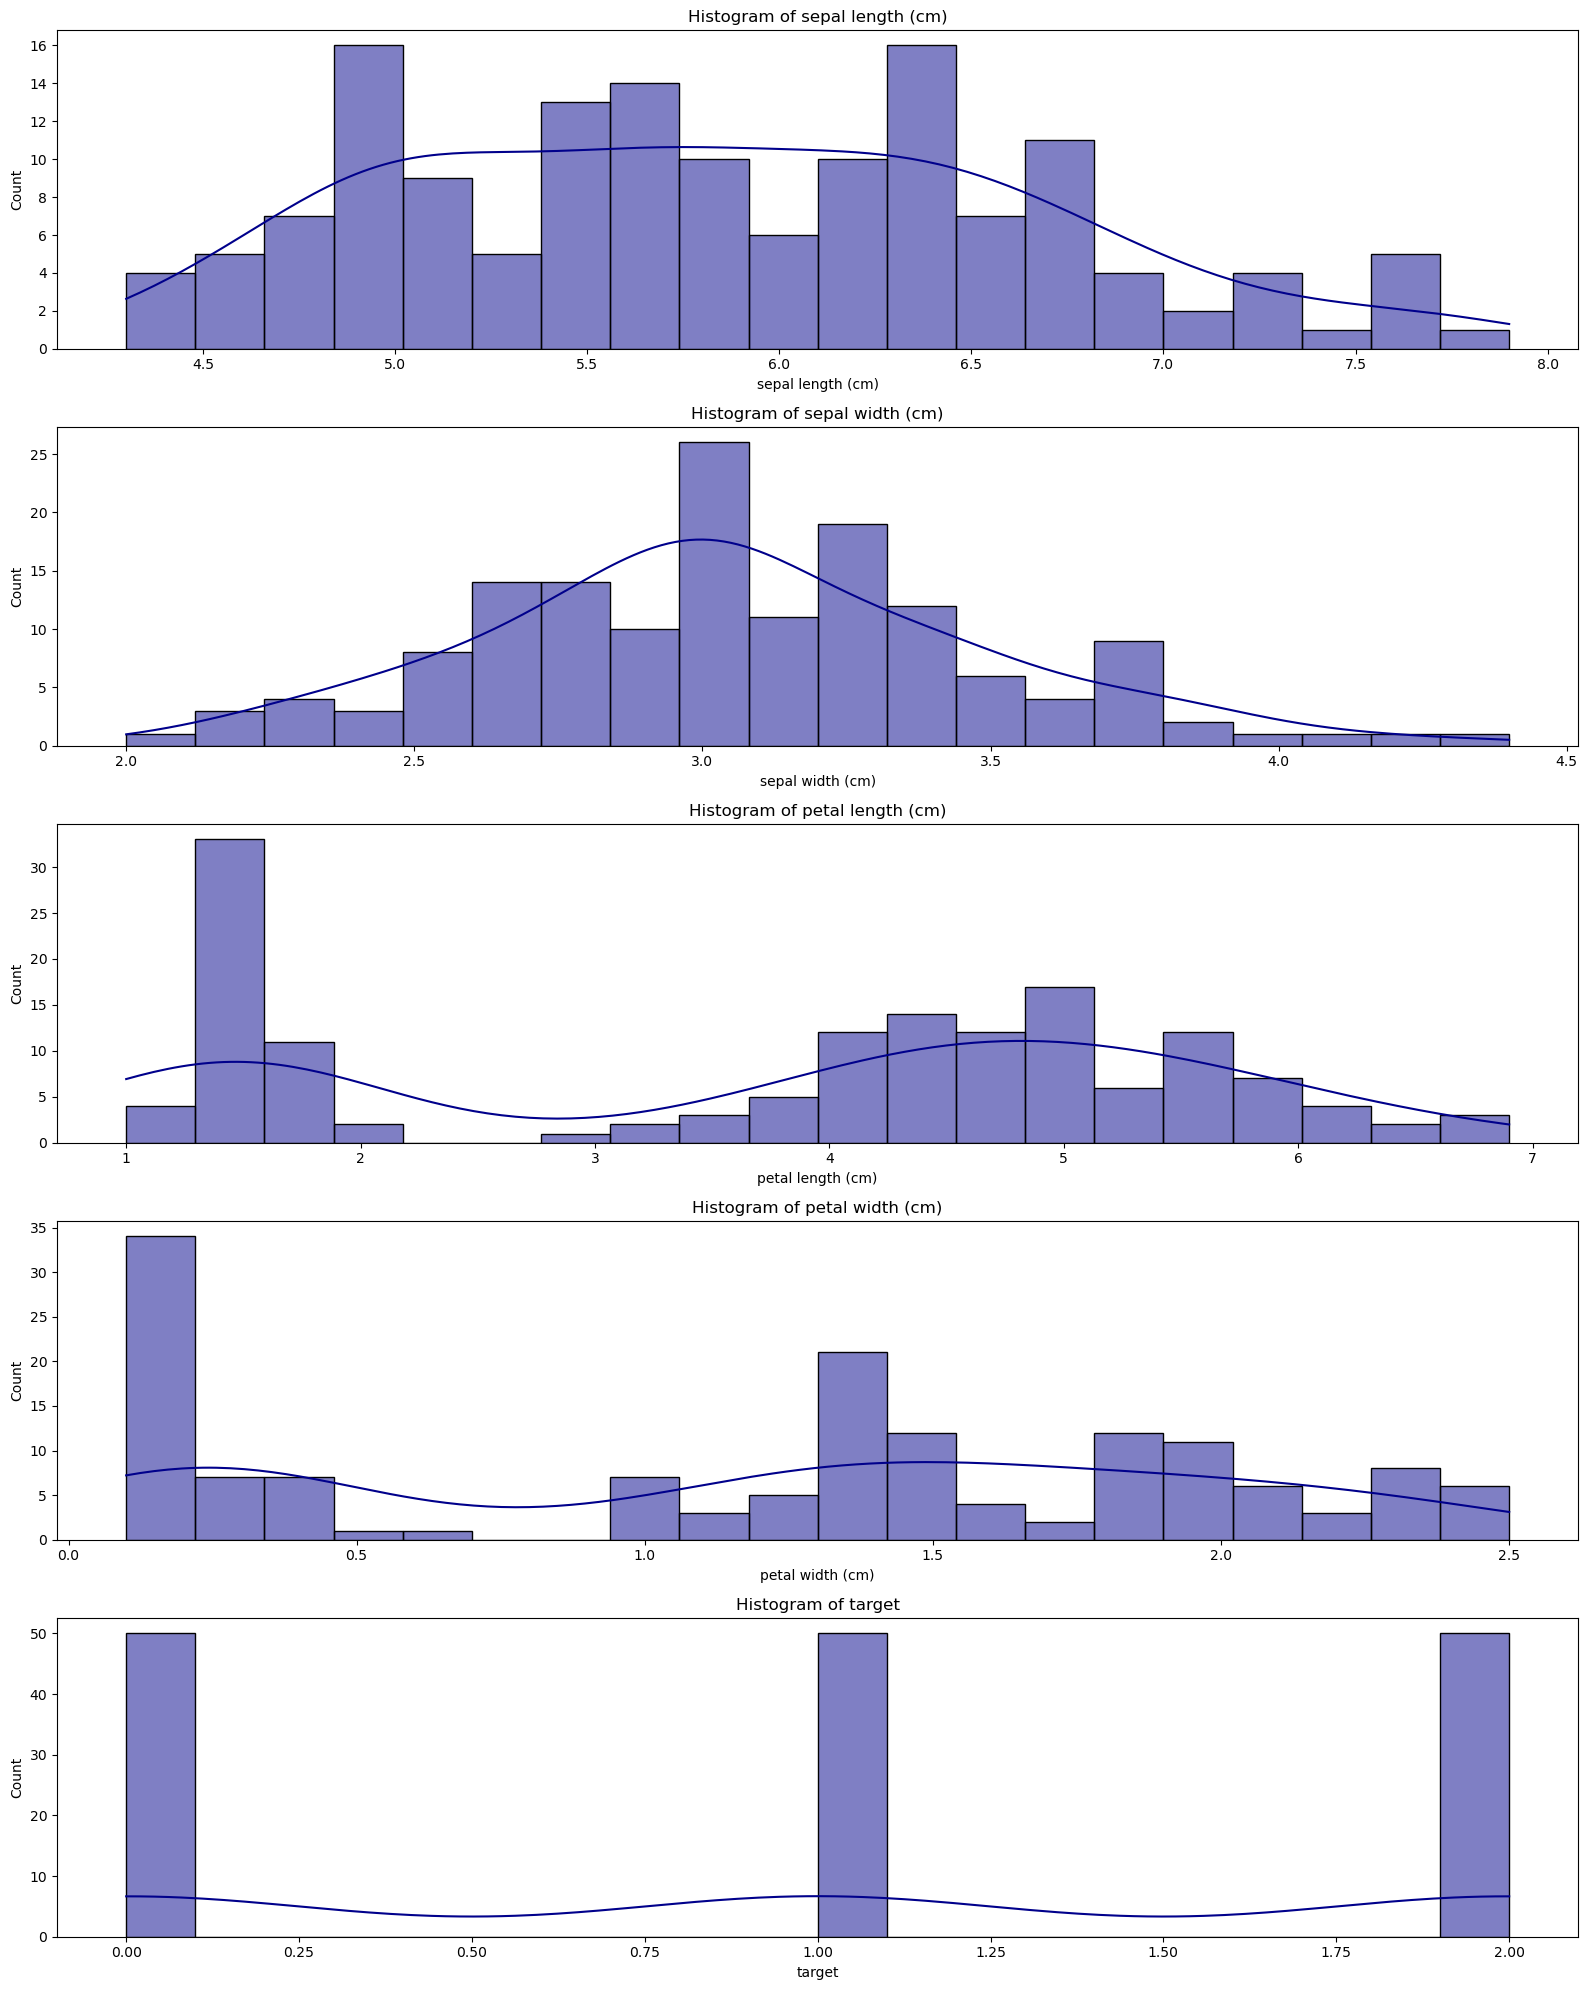

In [6]:
# Visualize the data
# Select numeric columns from the DataFrame
numeric_columns = iris.select_dtypes(['number']).columns

# Set up the subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(16,20))

# Plot histograms
for i, column in enumerate(numeric_columns):
    sns.histplot(iris[column], bins=20, kde=True, ax=axes[i], color='darkblue')
    axes[i].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

The above plots helps in data visulization. The sepal width and length follows a normal distribution with occurance of sepal length value maximum around 5-7 cm and occurance of sepal width value is maximum at 3cm. Target variable follows uniform distribution with 50 records equally at values 0,1 and 2. Occurance of petal length value is maximum around 1.2 cm and the occurance of petal width value is maximum around 0.1 cm.

C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


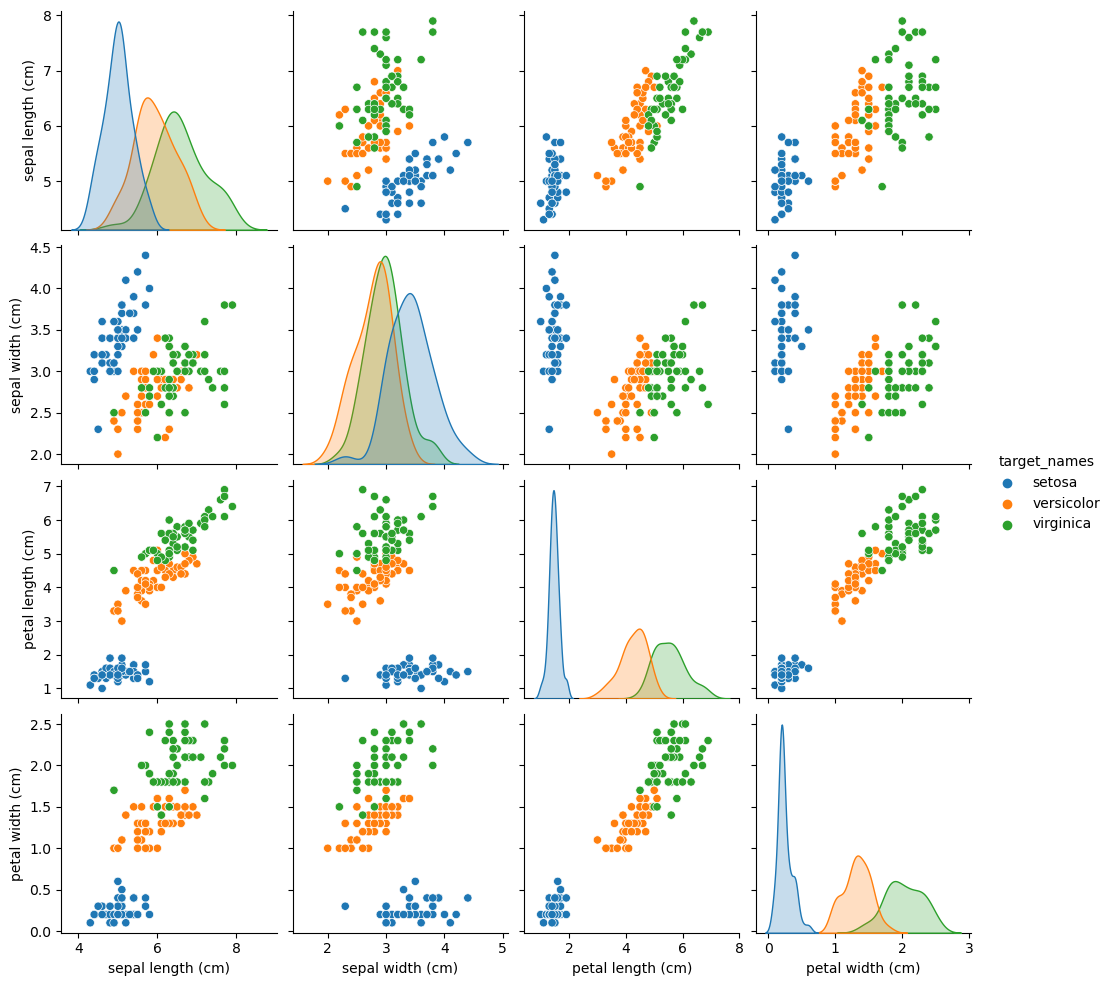

In [7]:
# Create pairplot
sns.pairplot(features_only, hue="target_names")
plt.show()

From the plots we are able to identify, Iris-setosa stands out with the highest sepal length, petal length, and width. On the other hand, Iris-virginica takes the lead in sepal width. Iris-versicolor positions itself with intermediate values for petal length and petal width. Additionally, Iris-virginica exhibits the smallest petal length and width among the three species.

Sepal length and sepal width showcase a robust correlation, especially within each species. This implies that if sepal length of an iris flower is known, its sepal width can be reasonably estimated.

Similarly, petal length and petal width exhibit a significant correlation, particularly within each species. However, it's worth noting that the correlation between petal length and petal width, doesn't reach the same correlation as observed between sepal length and sepal width.

Examining the petal length vs. petal width plot reveals a clear separation between the three species of iris flowers. This suggests that petal length and petal width are the two most important features for distinguishing between the different species of iris flowers.

The sepal length vs. sepal width plot shows that there is some overlap between the three species of iris flowers. This suggests that it is not possible to perfectly distinguish between the different species of iris flowers based on sepal length and sepal width alone.

In [8]:
# Feature Extraction
X = data.data

# Target Extraction
y = iris.target

Once our data is ready, we can move on to creating our model. It's important to set aside some of the data as using the entire dataset for training wouldn't leave any data for testing. If we use the same data to train and test the model, it might seem like it's performing well, but it's similar to cheating. The model recognizes the data it was trained on and so can predict correctly, however we wouldn't know if it truly works with a set of new, unseen data.

Keeping this in mind, we typically need to split our data into two sets: Training Data and Testing Data. As given, the required split is around 80% for training and 20% for testing. To achieve this, we use the train_test_split() function from sklearn, specifically designed for this purpose. If we don't specify any parameters, it defaults to a 75%-25% split.

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Decision Tree Implementation

Now let's build the decision tree classifier and teach it about the dataset. We start things off with the default_classifier, using the DecisionTreeClassifier class with a fixed random state for consistency. Next, let it learn from the training data (X_train and y_train), where it picks up on the patterns and connections in the dataset.

At the same time, we introduce another player – tuned_classifier. This one comes with some with tuned hyperparameters, like limiting the tree's maximum depth to 3 and requiring at least 5 samples to make a decision. These changes are like giving the model a little boost to make sure it's working at its best.

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Implement and train a decision tree classifier
default_classifier = DecisionTreeClassifier(random_state=40)
default_classifier.fit(X_train, y_train)

# Set and tune hyperparameters
tuned_classifier = DecisionTreeClassifier(
    random_state=40, max_depth=3, min_samples_split=5
)
tuned_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=40)

The resulting model (tuned_classifier) is created, indicating the chosen hyperparameters - a decision tree with a maximum depth of 3 and a minimum samples split of 5, all with a fixed random state of 40. This model is now ready to make predictions based on the learned patterns from the training data.

## Model Evaluation
The trained decision tree classifiers (default_classifier and tuned_classifier) is used to predict the species of iris flowers in the testing dataset (X_test). The predictions are stored in y_pred and y_pred_tuned. In terms of accuracy, the default decision tree model is 1.0, indicating perfect classification on the testing dataset. Achieving 100% accuracy on the testing set might suggest that the default model could be overfitting the training data. However, the tuned decision tree model achieves an accuracy of 0.97, showing consistent and optimal performance.

As for the classification report, precision, recall, and F1-score are metrics providing a more detailed understanding of model performance for each class. The classification reports for both default and tuned models demonstrate perfect precision, recall, and F1-score across all classes (0, 1, and 2). The macro-average and weighted-average metrics further confirm the overall high performance of the models.

In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Use the trained classifier to predict the species of iris flowers in the testing dataset
y_pred = default_classifier.predict(X_test)
y_pred_tuned = tuned_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

clf_report_default = classification_report(y_test, y_pred)
clf_report_tuned = classification_report(y_test, y_pred_tuned)

print("Accuracy (Default):", accuracy)
print("Accuracy (Tuned):", accuracy_tuned)
print("\nClassification Report (Default):\n", clf_report_default)
print("\nClassification Report (Tuned):\n", clf_report_tuned)

Accuracy (Default): 1.0
Accuracy (Tuned): 0.9666666666666667

Classification Report (Default):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Classification Report (Tuned):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [12]:
y_pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [13]:
y_pred_tuned

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

We'll now employ a tool called a confusion matrix to analyze the accuracy of our model's predictions. The primary purpose of the matrix is to reveal how many instances of each category were accurately classified. In essence, the matrix provides a breakdown of how many samples were correctly assigned to each category. When comparing the default prediction and tuned one we can see only one value is predicted wrong.

In [14]:
from sklearn.metrics import confusion_matrix
species = np.array(y_test)
preds = np.array(y_pred)
confusion_matrix(species, preds)

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]], dtype=int64)

Based on the above result, the confusion matrix is telling us that the model has succeeded in predicting the different classifications our data can be placed into.

1) Setosa (type 1) => Samples: 8, Correctly classified: 8
2) Versicolor (type 2) => Samples: 12, Correctly classified: 12
3) Virginica (type 3) => Samples: 10, Correctly classified: 10

## Visualization

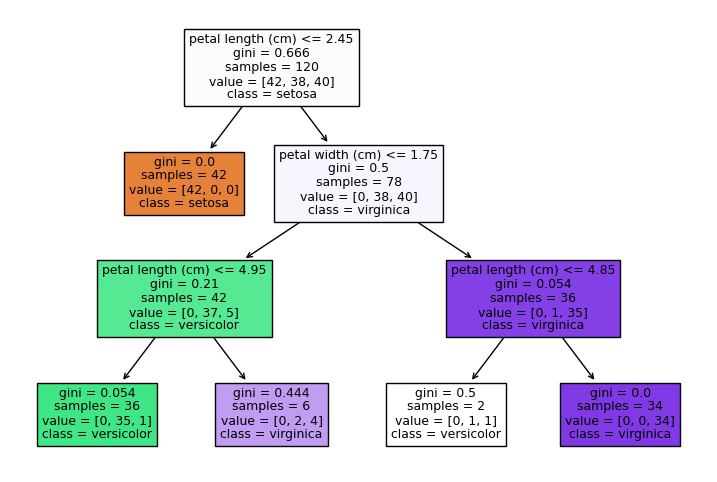

In [15]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(9, 6))
plot_tree(tuned_classifier, feature_names=data.feature_names, class_names=data.target_names.tolist(), filled=True)
plt.show()

The decision tree structure is visually presented using plot_tree. This graphical representation illustrates how the tree makes decisions at each node based on specific features.

By examining the decision tree rules and visualizing its structure, a comprehensive understanding of how the model partitions the feature space and makes predictions is seen. This insight is valuable for interpreting the decision-making process of the model.

Root Node:

1) First Level
    Feature: Petal length (cm)
    Split Condition: Less than or equal to 2.45
    Decision: If petal length is less than or equal to 2.45, the predicted class is 0.
2) Second Level:
    Feature: Petal length (cm)
    Split Condition: Greater than 2.45
    Subdivision: If petal length is greater than 2.45, it further considers petal length and petal width for decision-making.
3) Third Level:
    Feature: Petal width (cm)
    Split Condition: Less than or equal to 1.75
    Subdivision: If petal length is less than or equal to 1.75, the tree considers petal length for further decisions.
4) Fourth Level:
    Feature: Petal length (cm)
    Split Condition: Less than or equal to 4.95
    Decision: If petal length is less than or equal to 4.95, the predicted class is 1.

    Feature: Petal length (cm)
    Split Condition: Greater than 4.95
    Decision: If petal length is greater than 4.95, the predicted class is 2.
5) Fifth Level:
    Feature: Petal width (cm)
    Split Condition: Greater than 1.75
    Subdivision: If petal length is greater than 1.75, the tree considers petal length for further decisions.
6) Sixth Level:
    Feature: Petal length (cm)
    Split Condition: Less than or equal to 4.85
    Decision: If petal length is less than or equal to 4.85, the predicted class is 1.

    Feature: Petal length (cm)
    Split Condition: Greater than 4.85
    Decision: If petal length is greater than 4.85, the predicted class is 2.

The key features guiding the decisions are primarily "Petal Length" and "Petal Width" as model relies on these features to distinguish between the different classes.

The critical decision nodes are the points where the tree decides how to split the data. In this tree, critical decision nodes include the thresholds for petal length and petal width.

## Cross-Validation Implementation

In [16]:
from sklearn.model_selection import cross_val_score

# Cross-validation on default model
cv_scores1 = cross_val_score(default_classifier, X, y, cv=5)
print("Cross-Validation Scores (Default):", cv_scores1)
print("Mean CV Accuracy (Default):", cv_scores1.mean())
print("Standard deviation CV Accuracy (Default):", cv_scores1.std())

Cross-Validation Scores (Default): [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean CV Accuracy (Default): 0.9600000000000002
Standard deviation CV Accuracy (Default): 0.03265986323710903


In [17]:
# Cross-validation on tuned model
cv_scores2 = cross_val_score(tuned_classifier, X, y, cv=5)
print("Cross-Validation Scores (Tuned):", cv_scores2)
print("Mean CV Accuracy (Tuned):", cv_scores2.mean())
print("Standard deviation CV Accuracy (Tuned):", cv_scores2.std())

Cross-Validation Scores (Tuned): [0.96666667 0.96666667 0.93333333 1.         1.        ]
Mean CV Accuracy (Tuned): 0.9733333333333334
Standard deviation CV Accuracy (Tuned): 0.02494438257849294


The decision tree classifier (tuned_classifier) is evaluated on the entire dataset (X and y) using 5-fold cross-validation (cv=5), where the dataset is split into 5 folds, and the model is trained and tested multiple times. The cross_val_score function is used to obtain accuracy scores for each fold. The accuracy scores for each fold are 0.97, 0.97, 0.93, 1.0 and 1.0 with an average accuracy across all folds approximately 0.97, indicating a high level of consistency in model performance. The standard deviation of the accuracy scores is approximately 0.025, suggesting low variability and stability in the model's performance across different folds. The high mean accuracy and low standard deviation indicate that the tuned decision tree classifier is consistently accurate and stable across various subsets of the dataset.

When comparing both the models, the tuned model is performing better than the default model in terms of accuracy and consistency during cross-validation. Mean accuracy of the tuned model is higher, suggesting that, on average, it makes more accurate predictions across different folds and the standard deviation of accuracy for the tuned model is lower, indicating more consistency in performance across folds.

## Discussion and Conclusion 
In conclusion, our analysis of the Iris Flower dataset encompassed comprehensive steps from data exploration and preparation to the implementation and evaluation of a decision tree classifier. Here are the key takeaways:

Data Exploration:
Helped to gain insights into the dataset's structure and distribution through summary statistics, histograms, and pairplots.
The categorical target variable was encoded for efficient model training.

Decision Tree Implementation:
Decision tree classifier was implemented and trained on the dataset. Hyperparameters were tuned to optimize the model's performance. Tuning hyperparameters, such as adjusting the maximum depth to 3 and minimum samples split to 5, resulted in improved accuracy compared to the default model.

Model Evaluation:
The models exhibited outstanding accuracy, precision, recall, and F1-score, as reflected in the confusion matrices and classification reports. The default classifier achieved an accuracy of 100% on the testing dataset. 

Visualization:
The decision tree structures were visualized to provide intuitive insights into the decision-making process. It effectively used petal length and petal width to distinguish between the three classes of iris flowers. The structure of the tree reflects the hierarchical decision-making process, with critical decision nodes based on specific thresholds of these key features. The simplicity of the tree allows for interpretability and provides clear rules for classifying iris flowers based on their petal characteristics.

Cross-Validation:
K-fold cross-validation demonstrated the models' robustness and generalization capabilities. Cross-validation reinforced the models' consistency and reliability across different data subsets.

In summary, our analysis indicates that the decision tree classifiers, especially the tuned version, are highly effective in accurately classifying iris flower species based on their features. The models show promise for real-world applications, providing a reliable foundation for further exploration and utilization in practical scenarios.